## what are the most demanding skiils for top Data roles in India

In [64]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [26]:
df_india=df[df['job_location']=='India']

In [27]:
df_skills = df_india.copy()

# Convert string to actual list
df_skills['job_skills'] = df_skills['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Explode into individual skills
df_skills = df_skills.explode('job_skills')



In [28]:
df_skills[['job_title','job_skills']]

,job_title,job_skills
38,Data Quality and Governance Analyst 1,sql
38,Data Quality and Governance Analyst 1,python
38,Data Quality and Governance Analyst 1,databricks
38,Data Quality and Governance Analyst 1,power bi
38,Data Quality and Governance Analyst 1,excel
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,NaN
785740,AWS System Analyst,aws


In [43]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size().reset_index()
df_skills_count

,job_skills,job_title_short,0
0,airflow,Business Analyst,5
1,airflow,Cloud Engineer,1
2,airflow,Data Analyst,31
3,airflow,Data Engineer,263
4,airflow,Data Scientist,33
...,...,...,...
1218,zoom,Data Analyst,4
1219,zoom,Data Engineer,1
1220,zoom,Data Scientist,6
1221,zoom,Senior Data Engineer,3


In [48]:
df_skills_count.columns = ['job_skills','job_title_short','skill_count']
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count


,job_skills,job_title_short,skill_count
1016,sql,Data Engineer,1161
791,python,Data Engineer,1076
1015,sql,Data Analyst,1012
792,python,Data Scientist,1003
1017,sql,Data Scientist,728
...,...,...,...
1156,vba,Senior Data Scientist,1
1157,vba,Software Engineer,1
1123,ubuntu,Senior Data Engineer,1
256,dynamodb,Machine Learning Engineer,1


In [55]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

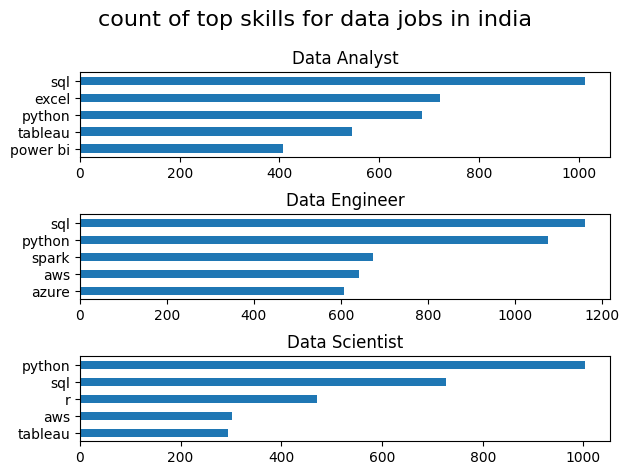

In [63]:
fig,ax=plt.subplots(len(job_titles),1)

for i ,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('count of top skills for data jobs in india',fontsize=16)
fig.tight_layout(h_pad=0.8)


In [71]:
df_job_total_count=df_india['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_total_count

,job_title_short,jobs_total
0,Data Analyst,2056
1,Data Engineer,1855
2,Data Scientist,1602
3,Business Analyst,661
4,Senior Data Engineer,425
5,Senior Data Analyst,400
6,Senior Data Scientist,301
7,Software Engineer,239
8,Machine Learning Engineer,71
9,Cloud Engineer,50


In [77]:
df_skills_perc=pd.merge(df_skills_count,df_job_total_count,how='left',on='job_title_short')
df_skills_perc['skill_perc']=df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100
df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,sql,Data Engineer,1161,1855,62.587601
1,python,Data Engineer,1076,1855,58.005391
2,sql,Data Analyst,1012,2056,49.221790
3,python,Data Scientist,1003,1602,62.609238
4,sql,Data Scientist,728,1602,45.443196
...,...,...,...,...,...
1218,vba,Senior Data Scientist,1,301,0.332226
1219,vba,Software Engineer,1,239,0.418410
1220,ubuntu,Senior Data Engineer,1,425,0.235294
1221,dynamodb,Machine Learning Engineer,1,71,1.408451


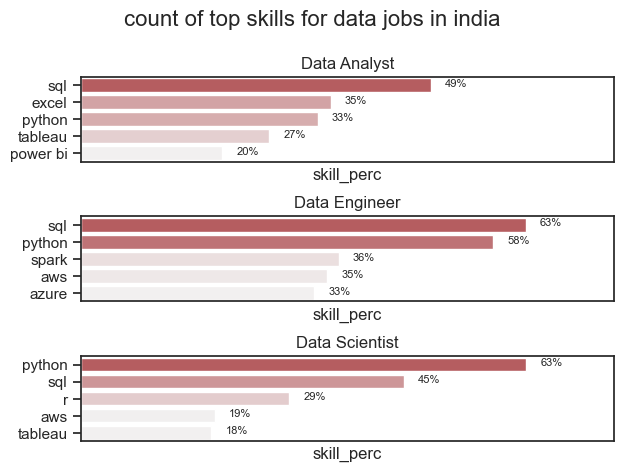

In [124]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')   ## useful to make visuals more eyes appealing
for i ,job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_perc',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_count',palette='light:r') 
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,75)
    ax[i].legend().set_visible(False)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+2,n-0.1,f'{v:.0f}%',va='center',fontsize=8)
    if i!=len('job_titles')-1:
        ax[i].set_xticks([])
    

     
fig.suptitle('count of top skills for data jobs in india',fontsize=16)
fig.tight_layout(h_pad=0.8)